In [1]:
print("heloo")

heloo


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
# feedback_samples = [
#     ("Work pressure is too high, no work-life balance.", "Negative", "High", "Flexible work hours"),
#     ("Good learning opportunities and supportive team.", "Positive", "Low", "Leadership training"),
#     ("Salary is not competitive compared to industry.", "Negative", "Medium", "Compensation review"),
#     ("Company provides great growth opportunities.", "Positive", "Low", "Employee recognition"),
#     ("Lack of career growth opportunities.", "Negative", "High", "Career development programs"),
#     ("Managers are very supportive and encourage innovation.", "Positive", "Low", "Innovation awards"),
#     ("Poor management decisions are affecting productivity.", "Negative", "Medium", "Management training"),
#     ("The company values employee well-being.", "Positive", "Low", "Mental health support"),
# ("The company provides excellent career growth opportunities with regular promotions and skill development programs.","Positive","Low","Leadership training programs"),
# ("The salary and benefits package is competitive, with annual hikes and performance bonuses that truly reward hard work.","Positive","Low","Maintain competitive salary structure"),
# ("The management is highly supportive and encourages innovation, making it a great environment for learning and professional development.","Positive","Low","Recognition awards for innovation"),
# ("A fantastic place to work! The leadership genuinely listens to employees' concerns and takes proactive steps to improve the workplace culture.","Positive","Low","Regular feedback sessions"),
# ("The workload is excessive, leading to high stress and burnout, with unrealistic deadlines that disrupt work-life balance.","Negative","High","Implement workload management strategies"),
# ("Salary hikes are minimal and not competitive with industry standards, making it difficult to stay motivated.","Negative","Medium","Conduct annual salary benchmarking"),
# ("Career progression is slow, and promotions are based more on favoritism rather than performance and skills.","Negative","High","Introduce transparent promotion criteria"),
# ("Management lacks clear vision and communication, leading to frequent project misalignment and unnecessary work pressure.","Negative","Medium","Improve internal communication strategies"),
# ("The company culture is toxic, with micromanagement and poor leadership decisions affecting productivity and employee morale.","Negative","High","Leadership and management training programs"),
# ]

# data = []
# for i in range(1, 201):
#     feedback, sentiment, attrition_risk, recommendation = random.choice(feedback_samples)
#     data.append([i,feedback, sentiment, attrition_risk, recommendation])

In [4]:
# df = pd.DataFrame(data, columns=["Employee_ID", "Feedback", "Sentiment", "Attrition_Risk", "Engagement_Recommendation"])
# df.to_csv("employee_sentiment_data.csv", index=False)

# df

In [5]:
df= pd.read_csv("C:\\Users\\prash\\Desktop\\python file\\resume_screening\\employee_sentiment_data.csv")
df.head()

,Employee_ID,Feedback,Sentiment,Attrition_Risk,Engagement_Recommendation
0,1,"The workload is excessive, leading to high str...",Negative,High,Implement workload management strategies
1,2,Good learning opportunities and supportive team.,Positive,Low,Leadership training
2,3,The management is highly supportive and encour...,Positive,Low,Recognition awards for innovation
3,4,"Career progression is slow, and promotions are...",Negative,High,Introduce transparent promotion criteria
4,5,A fantastic place to work! The leadership genu...,Positive,Low,Regular feedback sessions


<Axes: xlabel='count', ylabel='Attrition_Risk'>

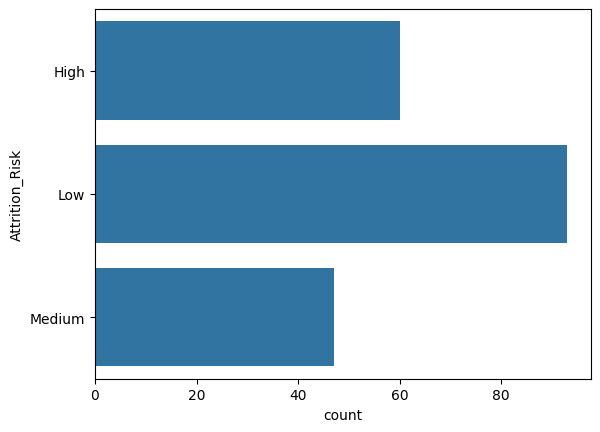

In [6]:
sns.countplot(df['Attrition_Risk'])

In [7]:
import re
def cleanCV(txt):
    txt= re.sub(r'http\S+|www\s',' ',txt)
    txt = re.sub(r'#\w+', ' ', txt) 
    txt = re.sub(r'\r\n',' ', txt)
    txt = re.sub(r'@\w+', ' ', txt)  
    txt = re.sub(r'[^a-zA-Z0-9\s]', ' ', txt) 
    return txt

In [8]:
df['Feedback']=df['Feedback'].apply(lambda x: cleanCV(x))
df.head()

,Employee_ID,Feedback,Sentiment,Attrition_Risk,Engagement_Recommendation
0,1,The workload is excessive leading to high str...,Negative,High,Implement workload management strategies
1,2,Good learning opportunities and supportive team,Positive,Low,Leadership training
2,3,The management is highly supportive and encour...,Positive,Low,Recognition awards for innovation
3,4,Career progression is slow and promotions are...,Negative,High,Introduce transparent promotion criteria
4,5,A fantastic place to work The leadership genu...,Positive,Low,Regular feedback sessions


In [9]:
df['Feedback'].values[0]

'The workload is excessive  leading to high stress and burnout  with unrealistic deadlines that disrupt work life balance '

In [22]:
df["Word_Count"] = df["Feedback"].apply(lambda x: len(x.split()))
df["Char_Count"] = df["Feedback"].apply(lambda x: len(x))


In [24]:
negative_words = ["stress", "burnout", "toxic", "micromanagement", "poor", "low salary", "overwork", "underpaid", "layoff", "unfair"]

def count_negative_words(text):
    return sum(1 for word in text.split() if word in negative_words)

df["Negative_Word_Count"] = df["Feedback"].apply(count_negative_words)


In [26]:
example = df['Feedback'][50]
example

'Poor management decisions are affecting productivity '

In [27]:
tokens=nltk.word_tokenize(example)
tags=nltk.pos_tag(tokens)

In [28]:
chunks=nltk.chunk.ne_chunk(tags)

VADER SCREENING 

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
sia = SentimentIntensityAnalyzer()

In [31]:
sia.polarity_scores('i am feeling')

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.128}

In [32]:
sia.polarity_scores(example)

{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}

In [ ]:
# from tqdm import tqdm
# # run the polarity score over all dataset
# res={}
# for i, row in tqdm(df.iterrows(),total=len(df)):
#     txt = row['Feedback']
#     myid = row['Employee_ID']
#     res[myid] = sia.polarity_scores(txt)
#     # break

100%|██████████| 200/200 [00:00<00:00, 3666.86it/s]


In [ ]:
# vaders= pd.DataFrame(res).T
# vaders = vaders.reset_index().rename(columns={'index':'Employee_ID'})
# vaders = vaders.merge(df, how='left')

In [69]:
# # vaders.head()
# df= vaders['compound']


In [ ]:

sia = SentimentIntensityAnalyzer()
def get_sentiment_score(txt):
    sentiment = sia.polarity_scores(txt)
    return sentiment["compound"]

# Apply sentiment analysis on feedback column
df["Sentiment_Score"] = df["Feedback"].apply(get_sentiment_score)


In [56]:
df["Sentiment_Label"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral")


In [82]:
features = ["Sentiment_Score", "Negative_Word_Count"]
x = df[features]
y = df["Attrition_Risk"] 


In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

# Accuracy & Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.875
              precision    recall  f1-score   support

        High       1.00      0.44      0.62         9
         Low       0.86      1.00      0.92        24
      Medium       0.88      1.00      0.93         7

    accuracy                           0.88        40
   macro avg       0.91      0.81      0.82        40
weighted avg       0.89      0.88      0.86        40



In [91]:
import pickle

# Save model
with open("attrition_model.pkl", "wb") as f:
    pickle.dump(model, f)
